In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv('training_data.csv')

print("Missing values:\n", df.isnull().sum())

# Split the data into features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

Missing values:
 x        0
y        0
label    0
dtype: int64


# In the above cell firstly i have imported pandas for data manipulation purpose like uploading data etc .
# Then i have imported numpy library for calculation part like sum and etc .
# Then i have imported StratifiedKFold and GridSearchCV for best checking the models.
# Then i have imported all the Machine learning models which i will apply on my dataset .
# Then i have imported matplotlib for visualizing my data.
# Then i have uploaded my csv data using pandas library.
# Then i have count all the null values in all my features.
# Then i have partitioned the features of my data in x and y , in x variable i have put all my features except target variable and in y i have inserted only target variable .

# Question NO. 1 

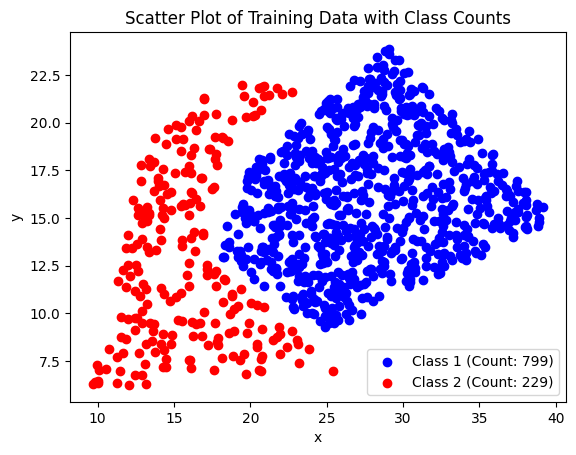

In [7]:
# Calculate the number of points in each class
class_1_count = len(df[df['label'] == 1])
class_2_count = len(df[df['label'] == 2])

# Plot the data points
plt.scatter(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], color='blue', label=f'Class 1 (Count: {class_1_count})')
plt.scatter(df[df['label'] == 2]['x'], df[df['label'] == 2]['y'], color='red', label=f'Class 2 (Count: {class_2_count})')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Training Data with Class Counts')
plt.legend()
plt.show()


# Here we can see that a non-linear boundary is forming where blue part is covex regular polygon and red part is concave polygon also we can see that here it is highly imbalanced data. 

# Question N0. 2-->

In [13]:
)# Load the dataset
df = pd.read_csv('training_data.csv')
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models and their parameter grids
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 10]},
    'RandomForest': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'LogisticRegression': {'C': [0.01, 0.1, 1.0]}
}

# Define individual metric functions
def precision(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 2) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 2))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def specificity(y_true, y_pred):
    TN = np.sum((y_true == 2) & (y_pred == 2))
    FP = np.sum((y_true == 2) & (y_pred == 1))
    return TN / (TN + FP) if (TN + FP) > 0 else 0

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Function to calculate and display confusion matrix
def print_conf_mat(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 2) & (y_pred == 2))
    FP = np.sum((y_true == 2) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 2))

    conf_mat = np.array([[TP, FN], [FP, TN]])
    
    print("Confusion Matrix:")
    print(pd.DataFrame(conf_mat, columns=['Predicted 1', 'Predicted 2'], 
                       index=['Actual 1', 'Actual 2']))
    print("\n")

# Stratified Cross-Validation setup
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

# Perform grid search on each classifier using Stratified Cross-Validation
best_models = {}
results = []

for model_name, model in models.items():
    gd_srch = GridSearchCV(model, param_grids[model_name], cv=skf)
    gd_srch.fit(X_train, y_train)
    best_models[model_name] = gd_srch.best_estimator_
    print(f"Best parameters for {model_name}: {gd_srch.best_params_}")
    
    # Predict using the best model on the test set
    y_pred = best_models[model_name].predict(X_test)
    
    # Calculate metrics using the defined functions
    precision_val = precision(y_test, y_pred)
    recall_val = recall(y_test, y_pred)
    specificity_val = specificity(y_test, y_pred)
    f1_val = f1_score(precision_val, recall_val)
    
    # Append results in list
    results.append({
        'Model': model_name,
        'Precision': precision_val,
        'Recall': recall_val,
        'Specificity': specificity_val,
        'F1-Score': f1_val
    })
    
    # Print confusion matrix for each model
    print(f"\nConfusion Matrix for {model_name}:")
    print_conf_mat(y_test, y_pred)

# Convert results to DataFrame for table format
print("\n\nThe table for precision, recall, specificity, and f1-score for all the models -->\n")
results_df = pd.DataFrame(results)

# Print the table
print(results_df)


Best parameters for DecisionTree: {'max_depth': 5}

Confusion Matrix for DecisionTree:
Confusion Matrix:
          Predicted 1  Predicted 2
Actual 1          159            1
Actual 2            1           45


Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 10}

Confusion Matrix for RandomForest:
Confusion Matrix:
          Predicted 1  Predicted 2
Actual 1          160            0
Actual 2            1           45


Best parameters for KNN: {'n_neighbors': 3}

Confusion Matrix for KNN:
Confusion Matrix:
          Predicted 1  Predicted 2
Actual 1          160            0
Actual 2            0           46


Best parameters for LogisticRegression: {'C': 1.0}

Confusion Matrix for LogisticRegression:
Confusion Matrix:
          Predicted 1  Predicted 2
Actual 1          157            3
Actual 2            6           40




The table for precision, recall, specificity, and f1-score for all the models -->

                Model  Precision   Recall  Specificity  

# From here we can conclude that KNN is best classifier model we get , although it do the overfitting
# Decision tree will not give the best result because in this we have a numerical features and in numerical features it doen not work well 
# That's why random forest also does not work well
# Logistic regression fail in this because logistic regression will always give linear decision boundary bi=ut here it is not the case.

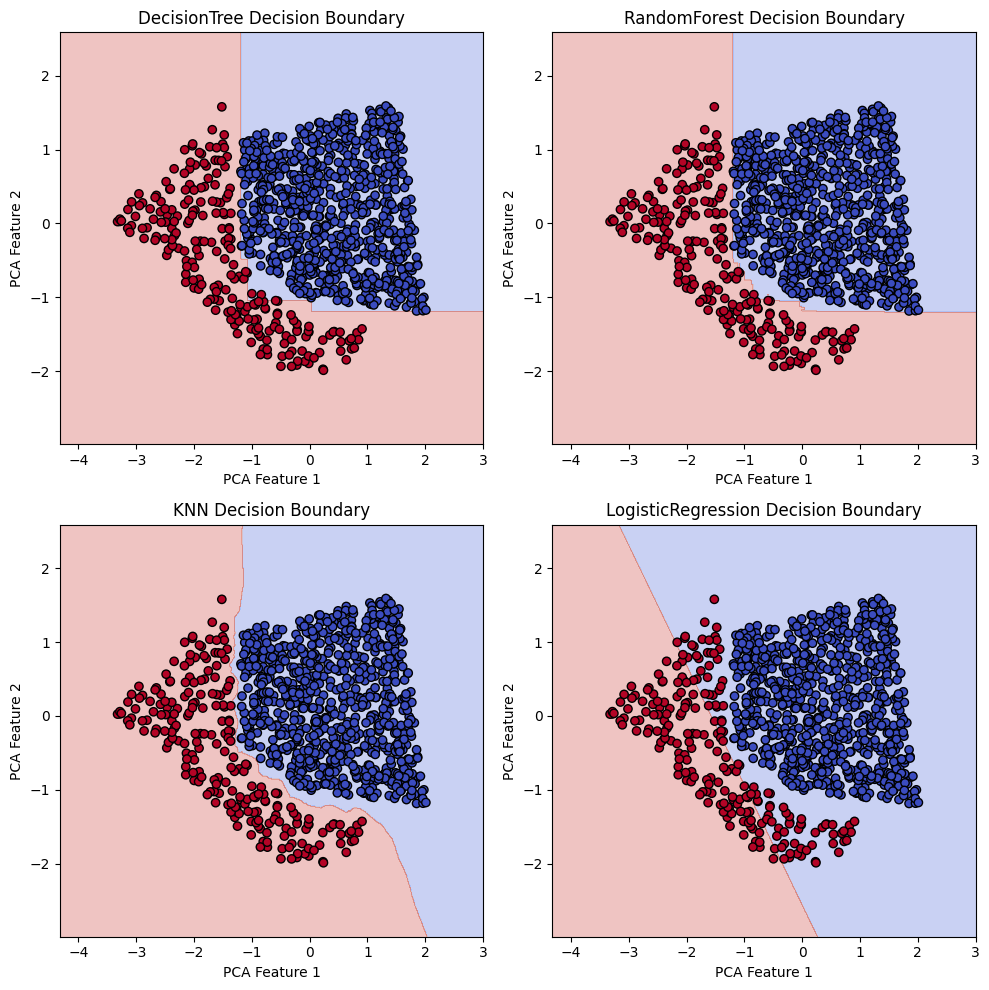

In [4]:
# Scale and apply PCA to retain 2 components (for visualizing on 2D plot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define a function to plot decision boundaries
def plot_decision_boundary(ax, model, X, y, title):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the entire grid to create decision boundaries
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    ax.set_title(f'{title} Decision Boundary')

# Number of models to plot
num_models = len(best_models)
cols = 2  # Define the number of columns
rows = (num_models + 1) // cols  # Calculate rows needed

# Set up subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5))
axes = axes.flatten()  # Flatten to easily iterate over it

# Plot decision boundaries for each model
for i, (model_name, model) in enumerate(best_models.items()):
    # Fit the model on the transformed PCA features
    model.fit(X_pca, y)

    # Plot the decision boundary
    plot_decision_boundary(axes[i], model, X_pca, y, model_name)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


# Here we can see that in KNN the decision boundary is very accurate , althouh overfitting is there but we ccan find here that it giving very accurate boundary

In [18]:

# Load the test data
test_df = pd.read_csv('test_data.csv')

# Initialize the KNN model with K = 3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train KNN model on the entire training dataset (X and y)
knn_model.fit(X, y)  # Assuming X and y from your previous training setup

# Predict using the test data as a DataFrame (preserving feature names)
test_pred = knn_model.predict(test_df)

# Save predictions to a text file
np.savetxt('test_predictions.txt', test_pred, fmt='%d', header="label", comments=" ")

print("Predictions saved to 'test_predictions.txt'")



Predictions saved to 'test_predictions.txt'


# Question No.3-->

In [19]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the training and test datasets
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('test_data.csv')

# Separate features and labels in the training data
X_train = train_df[['x', 'y']].values
y_train = train_df['label'].values

# Apply Min-Max Scaling to scale the training data
mm_scl = MinMaxScaler()
x_train_scl = mm_scl.fit_transform(X_train)

# Scale the test data using the same Min-Max Scaling
X_test = test_df[['x', 'y']].values
X_test_scaled = mm_scl.transform(X_test)

# Train the KNN classifier on the scaled features
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors as needed
knn.fit(x_train_scl, y_train)

# Predict on the scaled test data
test_pred = knn.predict(X_test_scaled)

# Save the predictions to a text file in the required format
np.savetxt('test_pred_transformed.txt', test_pred, fmt='%d', header="label",comments=" ")

# Print a message indicating completion
print("Predictions have been saved to 'test_pred_transformed.txt'")


Predictions have been saved to 'test_pred_transformed.txt'


# Here i have used the min- max scaling method because there are only two numericals feature are there and min-max scaling is best rather than PCA and LDA.